In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
df.isnull().sum()

Unnamed: 0         0
Foundation         0
1stFlrSF           0
KitchenQual        0
Fireplaces         0
HeatingQC          0
FullBath           0
BsmtQual          37
OpenPorchSF        0
GarageYrBlt       81
ExterQual          0
OverallQual        0
BsmtFinType1      37
YearBuilt          0
GarageArea         0
TotRmsAbvGrd       0
GarageCars         0
GrLivArea          0
YearRemodAdd       0
LotFrontage      259
Fence           1179
SalePrice          0
dtype: int64

In [21]:
###functions
def zscore_filter(df):
    ref = df.copy()
    for column in ref.columns:
        abs_zscore = stats.zscore(ref[column])
        for index,i in enumerate(abs_zscore):
            if abs(i) >= 3: 
                ref.drop(ref.index[index])
    return ref

def replace_Nan(df):
    ref_replaced = df.copy()
    ref_replaced['LotFrontage'].fillna(ref_replaced['LotFrontage'].mean(),inplace = True)
    ref_replaced['BsmtFinType1'].fillna(ref_replaced['BsmtFinType1'].mode()[0],inplace = True)
    ref_replaced['BsmtQual'].fillna(ref_replaced['BsmtQual'].mode()[0],inplace = True)
    
#     HaveGarage = ref_replaced['GarageYrBlt'].isnull()
#     for index in range(len(HaveGarage)):
#         if HaveGarage[index] == True: HaveGarage[index] = "Have"
#         else : HaveGarage[index] = "Don't Have"
#     HaveGarage = HaveGarage.infer_objects() #try to add make new column called HaveGarage
    
    ref_replaced['GarageYrBlt'].fillna(0,inplace = True)
    
#     ref_replaced.insert(len(ref_replaced.columns),"HaveGarage",HaveGarage) #try to add column in df
    
#             df_copy = df.copy();
#             GYB = df['GarageYrBlt'].copy()
#             GA = df['GarageArea'].copy()
#             GYB.fillna(0 , inplace = True)
#             for i,val in enumerate(GA):
#                 if val == 0:
#                     df_copy.drop(i)
#             print(GYB.isnull().sum())  #check that null in GYB happends when GA = 0
#             for i,val in enumerate(ref_replaced[column].isnull()): #try to fill na with Different value
#                 if val == True:
#                     if ref_replaced['GarageArea'][i] != 0:
#                         ref_replaced[column].index[i] = ref_replaced['YearBuilt'][i]
#                     else:
#                         ref_replaced[column].index[i] = 0
    return ref_replaced

def devide_by_max(max):
    return lambda a: float(a) / float(max)

def scale_features(df):
    ref_scaled = df.copy()
    subtraction = lambda a: 2021 - a
    for column in ref_scaled.columns:
        ref = np.array(ref_scaled[column])
        if column == 'GarageYrBlt' or column =='YearBuilt' or column == 'YearRemodAdd':
            vectorized_subt_by_2021 = np.vectorize(subtraction)
            ref = vectorized_subt_by_2021(ref)
        vectorized_devide_by_max = np.vectorize(devide_by_max(np.max(ref)))
        ref_scaled[column] = vectorized_devide_by_max(ref)
    return ref_scaled

def onehot(df):
    ref = pd.get_dummies(df)
    print(ref)

def plot_hist(df,in_color,binwidth,x_label,y_label):
    for i,column in enumerate(df.columns):
        sub = plt.figure(figsize=(15,30))
        sub = plt.subplot(len(df.columns)-4,4,i+1)
        sub.hist(df[column], color = in_color ,bins = int(180/binwidth))
        sub.set_title(str(column))
        sub.set_xlabel(str(x_label))
        sub.set_ylabel(str(y_label))

In [24]:
df = pd.read_csv('Logistic Regression Lab.csv')
target_var = df['SalePrice'].copy #y
df = df.drop(['Fence','SalePrice'],axis = 1) #x 

######seperate features by ways of preprocessing
features_type_num = ['1stFlrSF','OpenPorchSF','GarageYrBlt','YearBuilt',
                     'GarageArea','GrLivArea','YearRemodAdd','LotFrontage']
features_for_onehot = ['Foundation','KitchenQual','Fireplaces','HeatingQC','FullBath','BsmtQual','ExterQual',
                       'OverallQual','BsmtFinType1','TotRmsAbvGrd','GarageCars','SalePrice']

Index(['Unnamed: 0', 'Foundation', '1stFlrSF', 'KitchenQual', 'Fireplaces',
       'HeatingQC', 'FullBath', 'BsmtQual', 'OpenPorchSF', 'GarageYrBlt',
       'ExterQual', 'OverallQual', 'BsmtFinType1', 'YearBuilt', 'GarageArea',
       'TotRmsAbvGrd', 'GarageCars', 'GrLivArea', 'YearRemodAdd',
       'LotFrontage'],
      dtype='object')
        Unnamed: 0     1stFlrSF   Fireplaces     FullBath  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    729.500000     0.247789     0.613014     1.565068     0.085302   
std     421.610009     0.082393     0.644666     0.550916     0.121126   
min       0.000000     0.071185     0.000000     0.000000     0.000000   
25%     364.750000     0.187980     0.000000     1.000000     0.000000   
50%     729.500000     0.231671     1.000000     2.000000     0.045704   
75%    1094.250000     0.296515     1.000000     2.000000     0.124314   
max    1459.000000     1.000000     3.000000     3.000000     1.00000

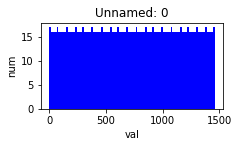

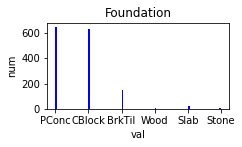

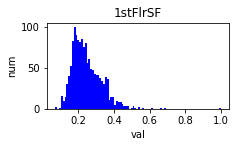

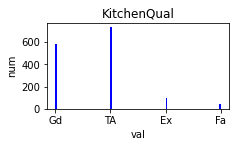

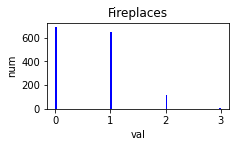

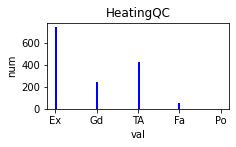

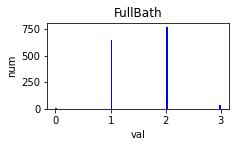

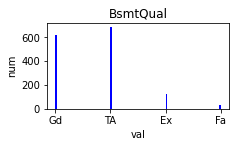

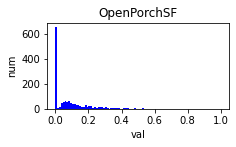

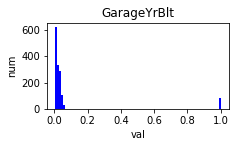

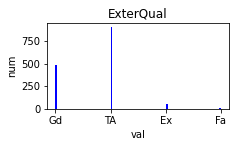

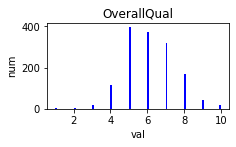

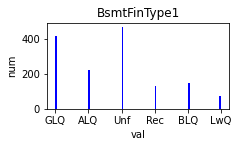

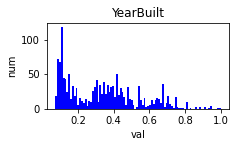

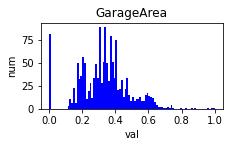

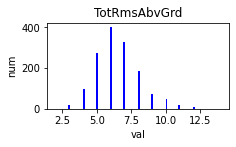

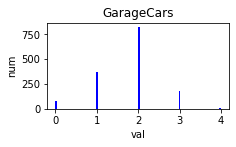

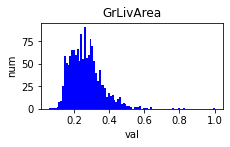

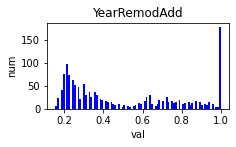

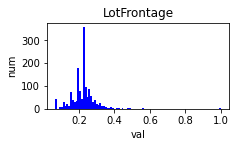

In [25]:
data = df.copy()
#####dealing with outliers,replace Nan, scaling infomation and fix skewed val
data[features_type_num] = zscore_filter(data[features_type_num])
data = replace_Nan(data)
print(data.columns)
data[features_type_num] = scale_features(data[features_type_num])

plot_hist(data,"blue",2,"val","num")
print(data.describe())

In [26]:
df.dtypes
# df = df.convert_dtypes()
# df.dtypes
print(df.describe())
print("///////////////////////////////////////////////////////////////")
df.skew(axis = 0, skipna = True)

        Unnamed: 0     1stFlrSF   Fireplaces     FullBath  OpenPorchSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    729.500000  1162.626712     0.613014     1.565068    46.660274   
std     421.610009   386.587738     0.644666     0.550916    66.256028   
min       0.000000   334.000000     0.000000     0.000000     0.000000   
25%     364.750000   882.000000     0.000000     1.000000     0.000000   
50%     729.500000  1087.000000     1.000000     2.000000    25.000000   
75%    1094.250000  1391.250000     1.000000     2.000000    68.000000   
max    1459.000000  4692.000000     3.000000     3.000000   547.000000   

       GarageYrBlt  OverallQual    YearBuilt   GarageArea  TotRmsAbvGrd  \
count  1379.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean   1978.506164     6.099315  1971.267808   472.980137      6.517808   
std      24.689725     1.382997    30.202904   213.804841      1.625393   
min    1900.000000     1.000000  

Unnamed: 0      0.000000
1stFlrSF        1.376757
Fireplaces      0.649565
FullBath        0.036562
OpenPorchSF     2.364342
GarageYrBlt    -0.649415
OverallQual     0.216944
YearBuilt      -0.613461
GarageArea      0.179981
TotRmsAbvGrd    0.676341
GarageCars     -0.342549
GrLivArea       1.366560
YearRemodAdd   -0.503562
LotFrontage     2.163569
dtype: float64

In [ ]:
onehot(df[features_for_onehot])